In [79]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from collections import namedtuple
import warnings

# Consumo Cerveja - São Paulo

Os dados (amostra) foram coletados em São Paulo, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos (média).

O conjunto de dados utilizado para esta atividade possui 7 atributos, sendo um Alvo, durante o período de um ano.

Atributos:

    - Data: Dia da Coleta
    - Temperatura Media (C): Temperatura Média do Dia em Celsius
    - Temperatura Minima (C): Temperatura Mínima do Dia em Celsius
    - Temperatura Maxima (C): Temperatura Máxima do Dia em Celsius
    - Precipitacao (mm): Precipitação do Dia em Milímetros
    - Final de Semana: Identificação se é fim de semana ou não
    - Consumo de cerveja (litros): Quantidade de cerveja em livros


Fonte: https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

## Carregamento de Dados

In [2]:
df = pd.read_csv('data/consumo_cerveja.csv')

In [3]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


## Limpeza Inicial de Dados

In [4]:
df.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Remover dados nulos
df = df[df.notna().any(axis=1)]

In [6]:
df.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467
364,2015-12-31,"24,76","20,2",29,0,0.0,22.446


## Tratamentos Dados

In [7]:
df.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

### Renomear colunas

In [8]:
df = df.rename(columns={
    "Data": "data",
    "Temperatura Media (C)": "temperatura_media_c",
    "Temperatura Minima (C)": "temperatura_minima_c",
    "Temperatura Maxima (C)": "temperatura_maxima_c",
    "Precipitacao (mm)": "precipitacacao_mm",
    "Final de Semana": "final_de_semana",
    "Consumo de cerveja (litros)": "consumo_cerveja_litros",
})

In [9]:
df.dtypes

data                       object
temperatura_media_c        object
temperatura_minima_c       object
temperatura_maxima_c       object
precipitacacao_mm          object
final_de_semana           float64
consumo_cerveja_litros    float64
dtype: object

### Converter Strings para Float

In [10]:
df.head()

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana,consumo_cerveja_litros
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [11]:
def substituir_virgula_por_ponto(x):
    return x.replace(',', '.')

df['temperatura_media_c'] = df['temperatura_media_c'].apply(substituir_virgula_por_ponto)
df['temperatura_minima_c'] = df['temperatura_minima_c'].apply(substituir_virgula_por_ponto)
df['temperatura_maxima_c'] = df['temperatura_maxima_c'].apply(substituir_virgula_por_ponto)
df['precipitacacao_mm'] = df['precipitacacao_mm'].apply(substituir_virgula_por_ponto)

df['temperatura_media_c'] = df['temperatura_media_c'].astype(float)
df['temperatura_minima_c'] = df['temperatura_minima_c'].astype(float)
df['temperatura_maxima_c'] = df['temperatura_maxima_c'].astype(float)
df['precipitacacao_mm'] = df['precipitacacao_mm'].astype(float)

In [12]:
df.dtypes

data                       object
temperatura_media_c       float64
temperatura_minima_c      float64
temperatura_maxima_c      float64
precipitacacao_mm         float64
final_de_semana           float64
consumo_cerveja_litros    float64
dtype: object

In [13]:
df.head()

,data,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana,consumo_cerveja_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


## Visualização de Varáveis

Text(0.5, 1.0, 'Temperatura Média Ambiente vs Consumo de Cerveja')

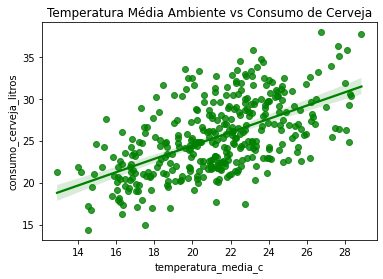

In [14]:
ax = sns.regplot(data=df, x='temperatura_media_c', y='consumo_cerveja_litros', color="green")

ax.set_title("Temperatura Média Ambiente vs Consumo de Cerveja")

Text(0.5, 1.0, 'Temperatura Mínima Ambiente vs Consumo de Cerveja')

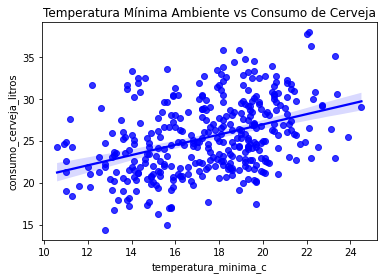

In [15]:
ax = sns.regplot(data=df, x='temperatura_minima_c', y='consumo_cerveja_litros', color="blue")

ax.set_title("Temperatura Mínima Ambiente vs Consumo de Cerveja")

Text(0.5, 1.0, 'Temperatura Máxima Ambiente vs Consumo de Cerveja')

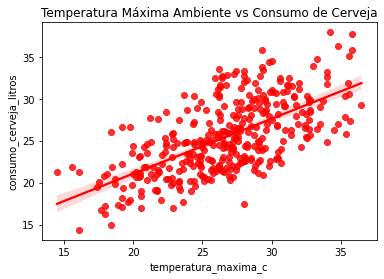

In [16]:
ax = sns.regplot(data=df, x='temperatura_maxima_c', y='consumo_cerveja_litros', color="red")

ax.set_title("Temperatura Máxima Ambiente vs Consumo de Cerveja")

Text(0.5, 1.0, 'Precipitação (mm) vs Consumo de Cerveja')

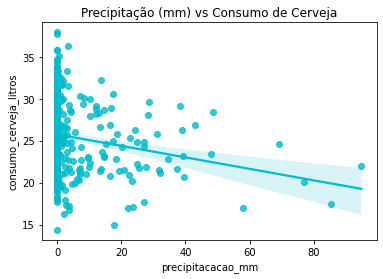

In [17]:
ax = sns.regplot(data=df, x='precipitacacao_mm', y='consumo_cerveja_litros', color="#0bc")

ax.set_title("Precipitação (mm) vs Consumo de Cerveja")

Text(0.5, 1.0, 'Fim de Semana vs Consumo de Cerveja')

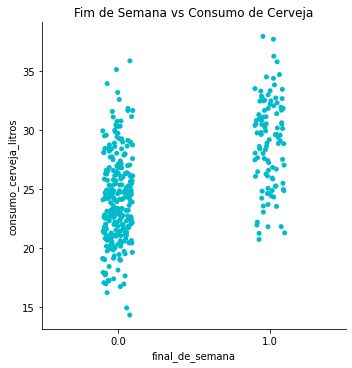

In [18]:
g = sns.catplot(data=df, x='final_de_semana', y='consumo_cerveja_litros', color="#0bc")

axes = g.axes.flatten()
axes[0].set_title("Fim de Semana vs Consumo de Cerveja")

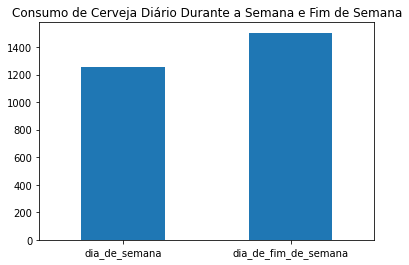

In [19]:
consumo_por_dia = {
    'dia_de_semana': df[df['final_de_semana'] == 0]['consumo_cerveja_litros'].sum()/5,
    'dia_de_fim_de_semana': df[df['final_de_semana'] == 1]['consumo_cerveja_litros'].sum()/2,
}

ax = pd.Series(consumo_por_dia).plot.bar()


ax.set_title("Consumo de Cerveja Diário Durante a Semana e Fim de Semana")
ax.set_xticklabels(labels=consumo_por_dia.keys(),rotation=0);

## Machine Learning

In [20]:
dataset = df.drop('data', axis=1)
dataset.head()

,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana,consumo_cerveja_litros
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900


### Separação Conjunto Treinamento e Teste

In [21]:
X = dataset.drop('consumo_cerveja_litros', axis=1)
X.head()

,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana
0,27.30,23.9,32.5,0.0,0.0
1,27.02,24.5,33.5,0.0,0.0
2,24.82,22.4,29.9,0.0,1.0
3,23.98,21.5,28.6,1.2,1.0
4,23.82,21.0,28.3,0.0,0.0


In [22]:
y = dataset['consumo_cerveja_litros']
y.head()

0    25.461
1    28.972
2    30.814
3    29.799
4    28.900
Name: consumo_cerveja_litros, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
X_train.shape

(255, 5)

In [25]:
X_test.shape

(110, 5)

In [27]:
X_train.head()

,temperatura_media_c,temperatura_minima_c,temperatura_maxima_c,precipitacacao_mm,final_de_semana
268,20.58,18.2,24.9,28.6,1.0
231,16.20,14.8,19.6,0.0,0.0
157,20.62,15.9,26.2,0.0,1.0
19,27.68,23.3,35.6,0.6,0.0
147,18.56,16.8,23.2,1.8,0.0


### Preprocessamento

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_train)

StandardScaler()

In [30]:
X_train_scaled = scaler.transform(X_train)

In [31]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4
0,-0.144948,0.322239,-0.351276,2.058366,1.692228
1,-1.519943,-0.855590,-1.581516,-0.420934,-0.590937
2,-0.132391,-0.474528,-0.049519,-0.420934,1.692228
3,2.083927,2.088981,2.132416,-0.368920,-0.590937
4,-0.779078,-0.162750,-0.745881,-0.264894,-0.590937


### Aprendizado

In [32]:
reg = LinearRegression()

In [33]:
reg.fit(X_train_scaled, y_train)

LinearRegression()

#### Função Preditora

In [34]:
interceptador = reg.intercept_
coeficientes = reg.coef_
funcao = "predição = {:.2f} + ({:.2f} * temperatura_media_c) + ({:.2f} * temperatura_minima_c) + ({:.2f} * temperatura_maxima_c) + ({:.2f} * precipitacacao_mm) + ({:.2f} * final_de_semana)".format(interceptador, *coeficientes)
print(funcao)

predição = 25.15 + (0.73 * temperatura_media_c) + (-0.30 * temperatura_minima_c) + (2.41 * temperatura_maxima_c) + (-0.62 * precipitacacao_mm) + (2.34 * final_de_semana)


In [35]:
def predict(X_sample):
    interceptador = reg.intercept_
    coeficientes = reg.coef_
    
    return interceptador + (reg.coef_ * X_sample).sum()

In [36]:
predict(X_train_scaled[0])

26.78695182412431

In [91]:
y_train.iloc[0]

29.637

#### Predição do Conjunto de Treinamento

In [37]:
y_pred = reg.predict(X_train_scaled)

In [38]:
## Performance no Conjunto de Treinamento
mean_squared_error(y_train, y_pred)

5.287330352851246

In [39]:
series = {
    'y_true': y_train,
    'y_pred': y_pred
}
series_df = pd.DataFrame(series)

def calcula_erro(x):
    return mean_squared_error([x['y_true']], [x['y_pred']])


series_df['rmse'] = series_df.apply(calcula_erro, axis=1)
series_df.head()

,y_true,y_pred,rmse
268,29.637,26.786952,8.122775
231,17.655,19.372579,2.950076
157,30.498,29.294561,1.448264
19,35.127,30.017312,26.108907
147,24.683,21.618263,9.392610


<AxesSubplot:xlabel='y_true', ylabel='y_pred'>

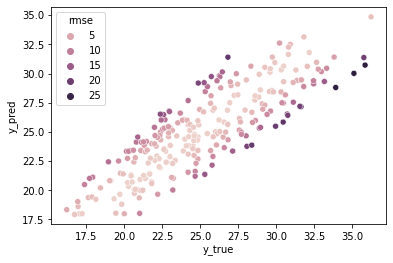

In [40]:
sns.scatterplot(data=series_df, x="y_true", y="y_pred", hue="rmse")

#### Predição do Conjunto de Teste

In [41]:
X_test_scaled = scaler.transform(X_test)

In [42]:
y_pred = reg.predict(X_test_scaled)

In [46]:
## Performance no Conjunto de Teste
mean_squared_error(y_test, y_pred)

5.589532075363932

In [44]:
series = {
    'y_true': y_test,
    'y_pred': y_pred
}
series_df = pd.DataFrame(series)

def calcula_erro(x):
    return mean_squared_error([x['y_true']], [x['y_pred']])


series_df['rmse'] = series_df.apply(calcula_erro, axis=1)
series_df.head()

,y_true,y_pred,rmse
193,25.640,25.600410,0.001567
33,31.655,26.971177,21.938196
15,29.938,28.156765,3.172799
309,20.575,21.639767,1.133730
57,26.241,27.278934,1.077308


<AxesSubplot:xlabel='y_true', ylabel='y_pred'>

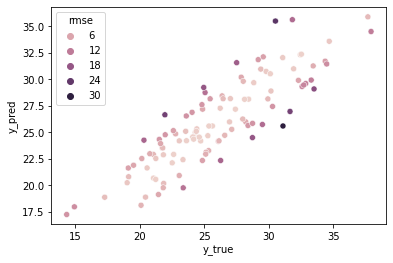

In [45]:
sns.scatterplot(data=series_df, x="y_true", y="y_pred", hue="rmse")

#### Teste Aleatório

In [86]:
def predict_test(index):
    
    exemplo = X_test.iloc[index]
    
    print("Exemplo:")
    print(exemplo)
    print('')
    
    y_true_exemplo = y_test.iloc[index]
    
    Resultado = namedtuple('Resultado', ['y_true', 'y_pred'])
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        X_exemplo_scaled = scaler.transform([exemplo])
    
    y_pred_exemplo = reg.predict(X_exemplo_scaled)[0]
    
    print("Resultado:")
    return Resultado(y_true_exemplo, round(y_pred_exemplo,3))

In [94]:
predict_test(50)

Exemplo:
temperatura_media_c     18.08
temperatura_minima_c    14.10
temperatura_maxima_c    26.20
precipitacacao_mm        0.00
final_de_semana          1.00
Name: 233, dtype: float64

Resultado:


Resultado(y_true=30.177, y_pred=28.902)